In [1]:
## ---- Loading Packages Into Memory -------------------------------------------
library(readr)
library("ggplot2")
library("dplyr")
library("tidyr")
library("stringr")
#library("purr")
library("forcats")
library("grDevices")
library("data.table")
library("tidyverse")
library("latex2exp")
library("irlba") 
library("plot3D")
library("rgl")
library("kableExtra")
library("NbClust")
library(factoextra)
library(diceR)
library(cluster)
library(FactoMineR)
library("class")
library("MASS")
library("FNN")
library("mclust") # Good for GMM clustering/ BIC
library(ClusterR)
library(ConsensusClusterPlus)
library(ALL)
library(datasets)
library(irlba)
library(network)
library(huge)
library(ElemStatLearn)

Warning message:
"package 'readr' was built under R version 4.1.3"
Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"package 'dplyr' was built under R version 4.1.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyr' was built under R version 4.1.3"
Warning message:
"package 'stringr' was built under R version 4.1.3"
Warning message:
"package 'forcats' was built under R version 4.1.3"
Warning message:
"package 'data.table' was built under R version 4.1.3"

Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


Warning message:
"package 'tidyverse' was built under R version 4.1.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v tibble 3.1.6     v purrr  0.3.4

Warning messa

In [2]:

## ---- Colour Palette ---------------------------------------------------------
    cbPalette <- c(
      "#999999", "#E69F00", "#56B4E9", "#009E73",
      "#F0E442", "#0072B2", "#D55E00", "#CC79A7") # colour-blind friendly palette

## ---- Data Set ---------------------------------------------------------------

    # Gene expression cancer RNA-Seq Data Set
    # https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

    # loading dataset 
    data <- as_tibble(read.csv("data.csv",
                               header = TRUE,
                               row.names = 1))


    labels <- as_tibble(read.csv("labels.csv",
                                 header = TRUE,
                                 row.names = 1))

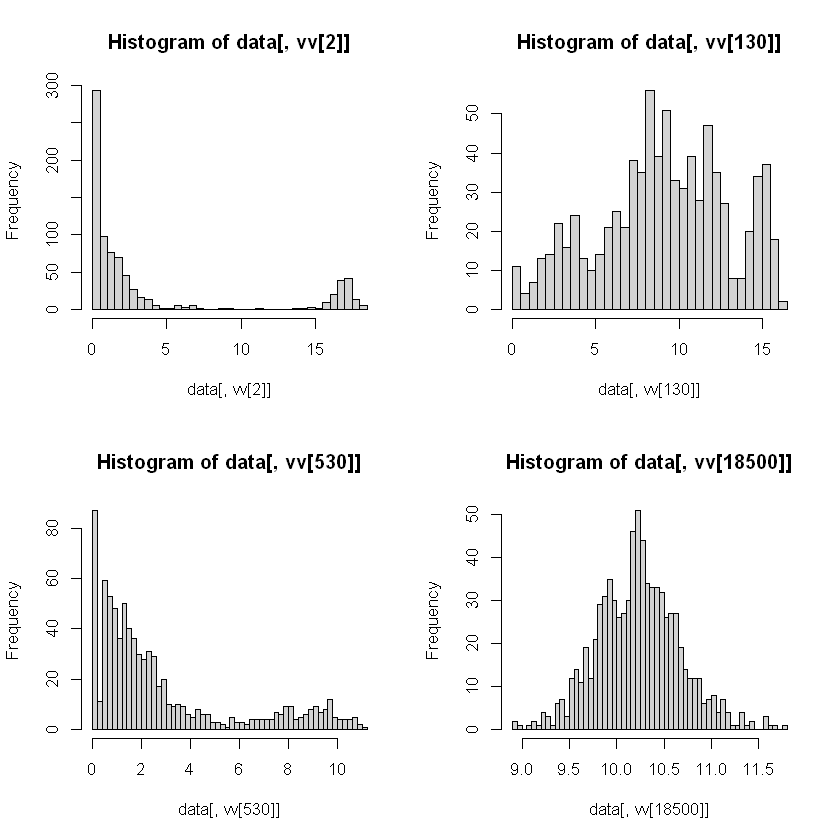

In [3]:
# Use Rebeckas method to sort the features by variance 
#load("data.csv")

# Compute sd of each gene:
vv <- apply(data, 2, sd)

# Sort from highest to lowest sd:
vv<- rev(sort.list(vv))

# Seems to be easier to work with dataframe than tibble
data <- as.data.frame(data)

# some examples of filtered features
par(mfrow=c(2,2))
hist(data[,vv[2]],50)
hist(data[,vv[130]],50)
hist(data[,vv[530]],50)
hist(data[,vv[18500]],50)

# Select the 5000 genes with highest sd
guse <- vv[1:5000]
X <- data[,guse]

comp 1   comp 2   comp 3   comp 4   comp 5   comp 6 
773.2483 567.2364 462.7877 359.2770 163.2589 137.5581

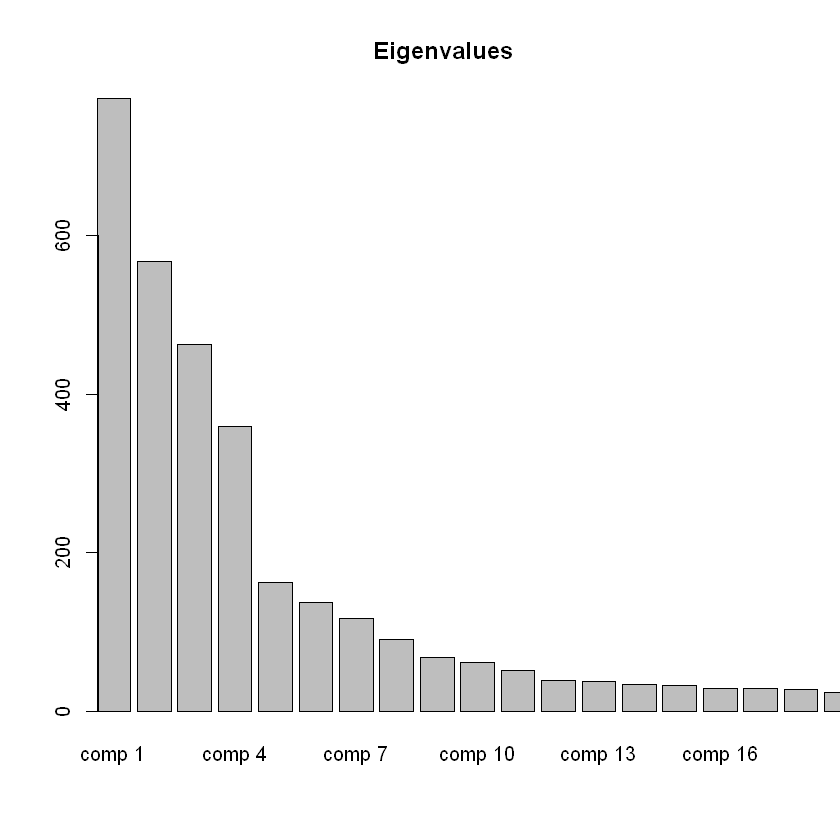

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,773.24833,15.4649666,15.46497
Dim.2,567.23641,11.3447283,26.80969
Dim.3,462.78769,9.2557538,36.06545
Dim.4,359.27702,7.1855405,43.25099
Dim.5,163.25895,3.2651789,46.51617
Dim.6,137.55812,2.7511623,49.26733
Dim.7,117.23799,2.3447598,51.61209
Dim.8,90.68758,1.8137515,53.42584
Dim.9,67.48587,1.3497173,54.77556
Dim.10,62.31319,1.2462639,56.02182


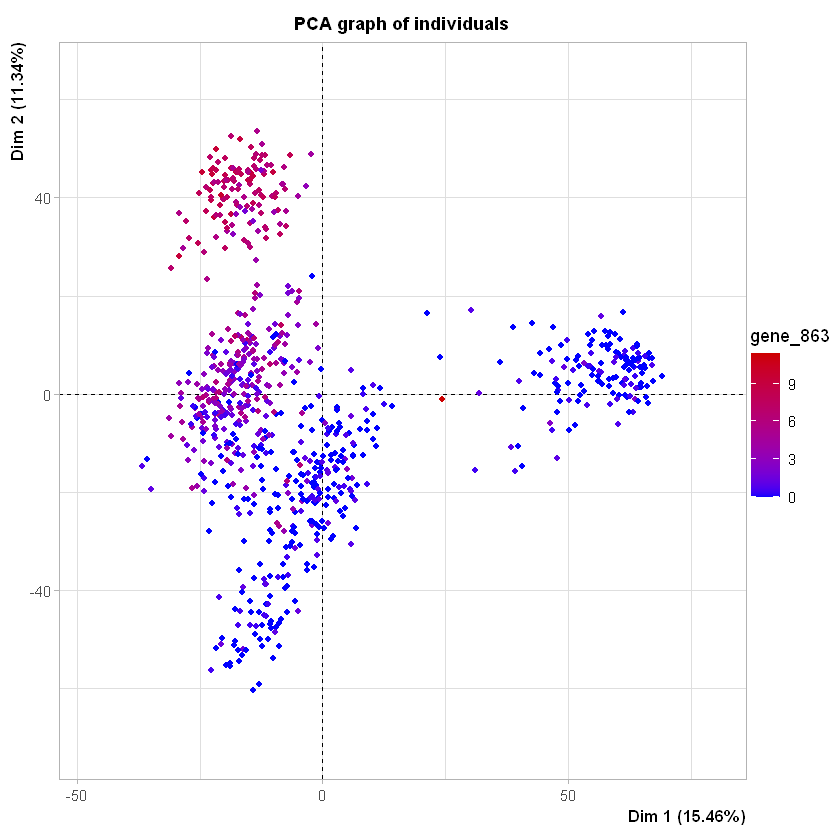

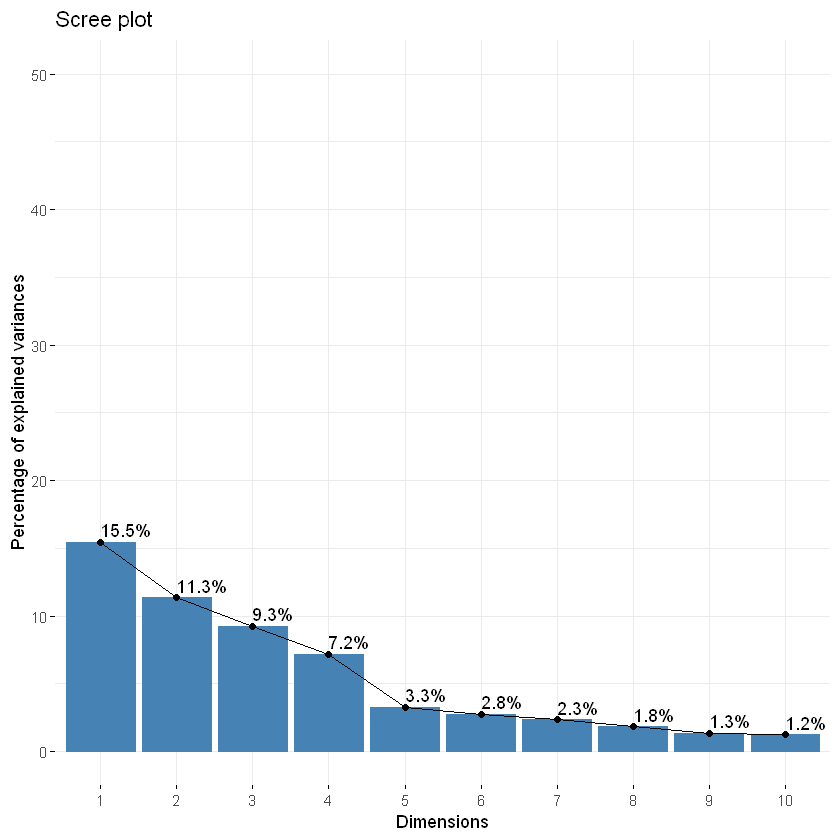

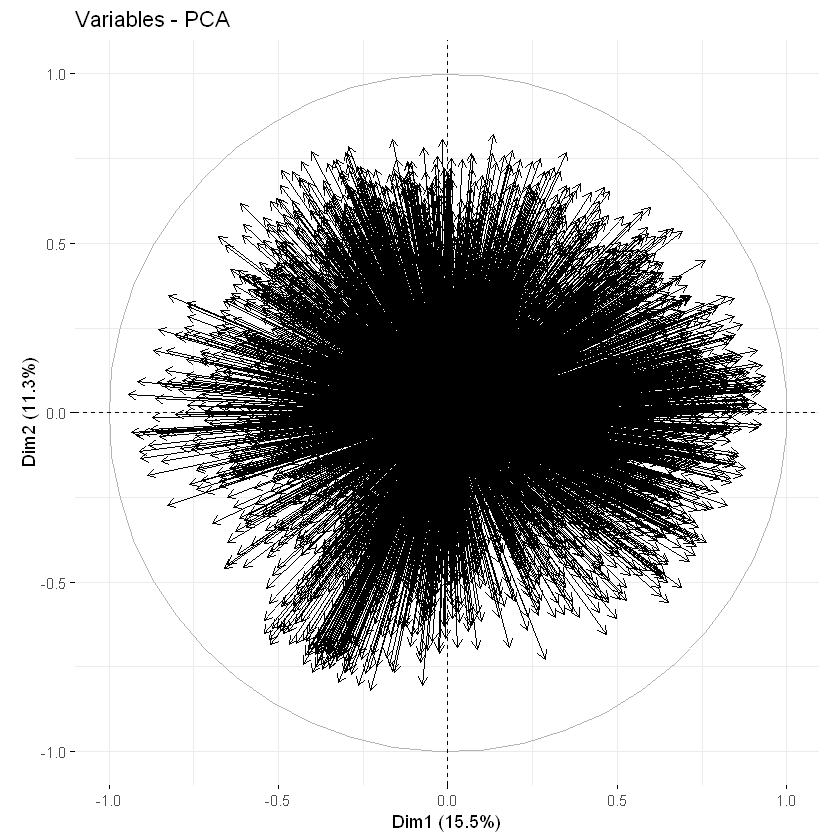

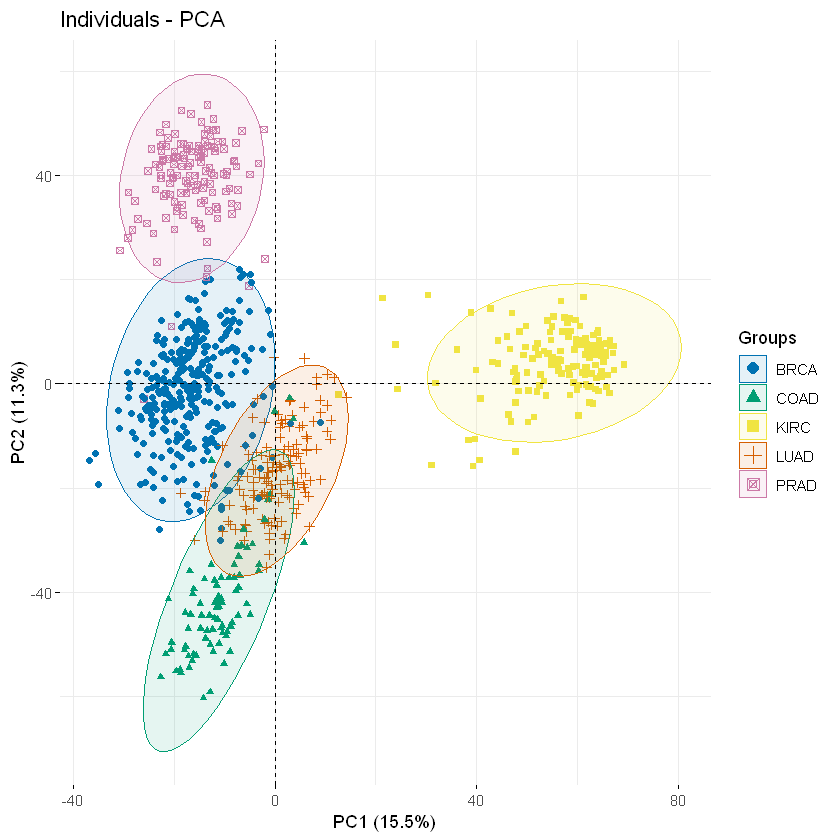

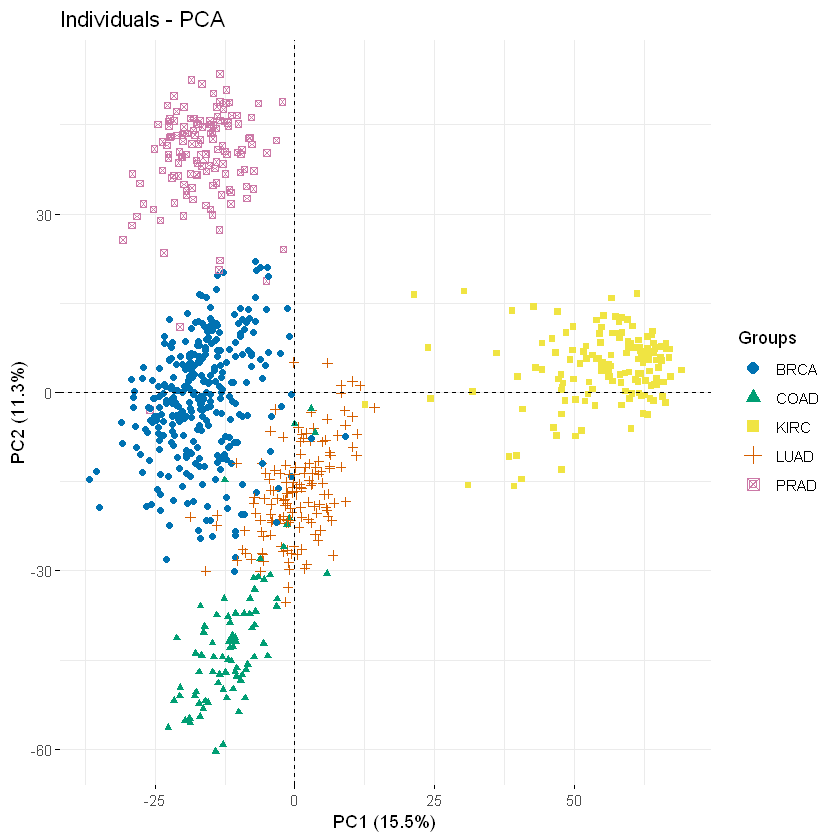

In [8]:

library(FactoMineR)

X <- data[,guse]


res.pca <- PCA(X, scale.unit = TRUE, ncp = 5, graph = FALSE)

head(res.pca$eig[,1])

barplot(res.pca$eig[,1], 
        main = "Eigenvalues",
        xlim = c(1,20))
        #names.arg = 1:nrow(res.pca$eig))
plot(res.pca, 
     choix = "ind",
     habillage = 801,
     label = "none",
     xlab = "PC1 (15.46%)",
     ylab = "PC2 (11.34%)")

# Get eigenvalues using factoextra package
# The eigenvalues measure the amount of variation
# retained by each principal component. 
eig.val <- get_eigenvalue(res.pca)
eig.val

# Eigenvalues are large for the first pc and small for the latter (because
# the first components are the directions containing the most of the datasets 
# variation)


# Scree plot using factoextra package
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0,50))

# From this plot we see that we might want to stop at the 10th principal
# component, as more than 50% of variation is explained by these components. 

# Graph of variables
vari <- get_pca_var(res.pca)

# To plot variables:
fviz_pca_var(res.pca, col.var = "black", label = "none")

# Colour by groups
# Create a grouping variable using kmeans
# Trying 5 centers
set.seed(123)
res.km <- kmeans(vari$coord, centers = 5, nstart = 25)
grp <- as.factor(res.km$cluster)

#colour variables by groups (from labels)

# Add labels to data
data_newest <- cbind(labels, data)

# Factorise categorical data (to be able to use col.ind)
C <- as.factor(data_newest$Class)

# Get individuals
ind <- get_pca_ind(res.pca)

# Plot individuals grouped by colour
fviz_pca_ind(res.pca, 
             geom.ind = "point",
             col.ind = C,
             palette = c(cbPalette[6],
                         cbPalette[4],
                         cbPalette[5],
                         cbPalette[7],
                         cbPalette[8]),
             addEllipses = TRUE,
             legend.title = "Groups",
             xlab = "PC1 (15.5%)",
             ylab = "PC2 (11.3%)")

# Without ellipses
fviz_pca_ind(res.pca, 
             geom.ind = "point",
             col.ind = C,
             palette = c(cbPalette[6],
                         cbPalette[4],
                         cbPalette[5],
                         cbPalette[7],
                         cbPalette[8]),
             addEllipses = FALSE,
             legend.title = "Groups",
             xlab = "PC1 (15.5%)",
             ylab = "PC2 (11.3%)")

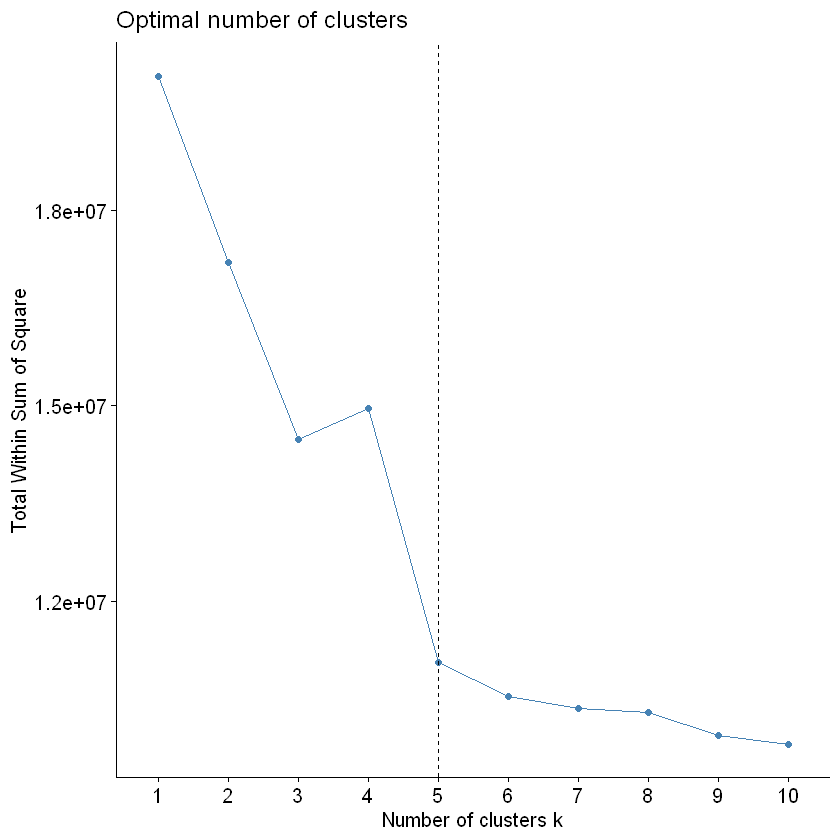

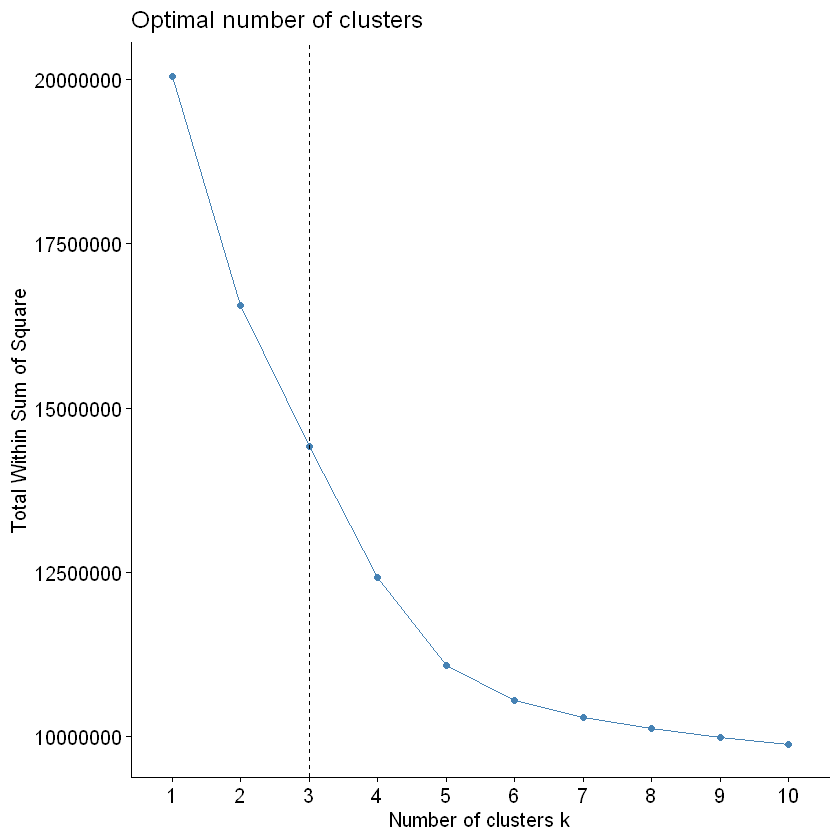

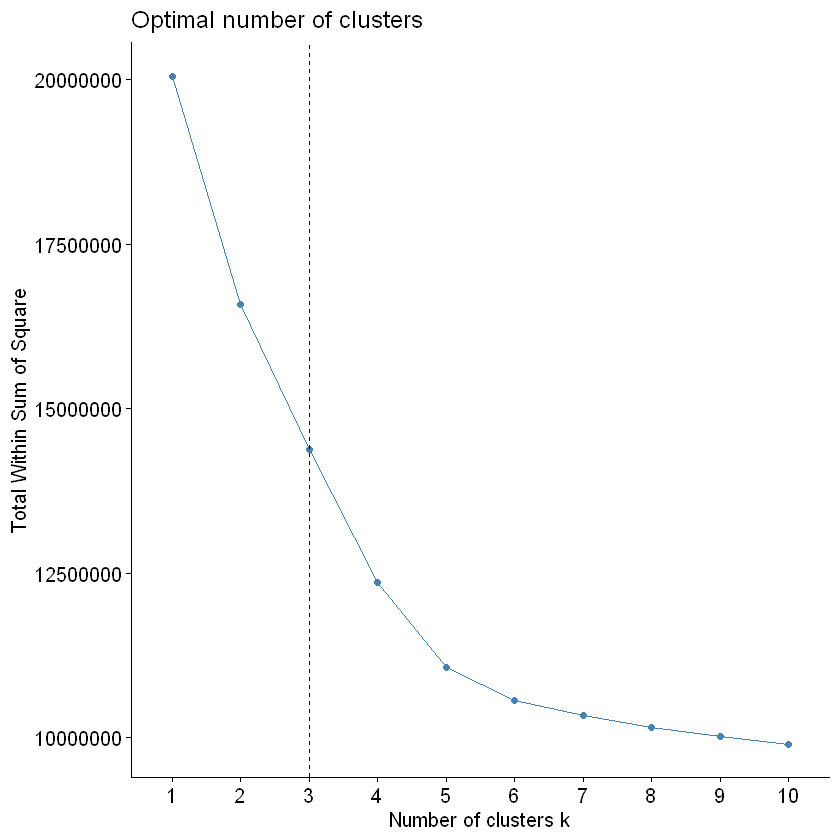

In [4]:
  
## ---- TASK 4 ----------------------------------------------------------------- 
  
  ## ---- Within Cluster Scatter -----------------------------------------------
  
  # Note that I start by assuming that we should expect 5 clusters (for each 
  # cancer type) - however, this is not necessarily true ig
  
  # Simple solution to get k from 
  # https://www.datanovia.com/en/lessons/k-means-clustering-in-r-algorith-and-practical-examples/
   # Idea is to compute k-means clustering using different values of clusters k
  # Next, wss (within sum of squares) is drawn according to the number of clusters
  # The location of a bend (knee) in the plot is generally considered as an 
  # indicator of the appropriate number of clusters
  
  # From https://rpkgs.datanovia.com/factoextra/reference/fviz_nbclust.html
  # fviz_nbclust() determines and visualise the optimale number of clusters using
  # different methods:
  # - Within cluster sum of squares
  # - Average silhouette
  # - gap statistics
  
  # fviz_gap_stat() visulise the gap statistic generated by the function
  # clusGap() (in cluster package)
  # The optimal number of clusters is specified using the "firstmax" method
  
  
  # Optimal number of clusters in the data
  library(cluster)


    X <- data[,guse]
  ## ---- Looking at the knees/ wss --------------------------------------------
  # The lower wss, the better
 # if (FALSE){
  # kmeans:
  fviz_nbclust(X, kmeans, method = "wss") + 
    geom_vline(xintercept = 5, linetype = 2)
  
  # pam:
  fviz_nbclust(X, cluster::pam, method = "wss") + 
    geom_vline(xintercept = 3, linetype = 2)
  
  # hierarchical clustering
  fviz_nbclust(X, hcut, method = "wss") + 
    geom_vline(xintercept = 3, linetype = 2)
  
 # }
  


In [ ]:
  ## ---- Average Clusters Silhouette ------------------------------------------
  # The higher the better.
  # Average silhouette
  
  if (FALSE){
    # kmeans:
    fviz_nbclust(X, kmeans, method = "silhouette") + 
      geom_vline(xintercept = 3, linetype = 2)
    
    # pam:
    fviz_nbclust(X, pam, method = "silhouette") + 
      geom_vline(xintercept = 3, linetype = 2)
    
    # hierarchical clustering
    fviz_nbclust(X, hcut, method = "silhouette") + 
      geom_vline(xintercept = 3, linetype = 2)
    
  }
  
  

In [ ]:
### OBS!  This does not run!
  ## ---- Gap statistic --------------------------------------------------------
  # The higher, the better
  
  set.seed(123)
  # Compute gap statistic for kmeans
  # Recommended B = 500
  gap_stat <- clusGap(X, FUN = kmeans, nstart = 25, K.max = 6, B = 10)
  print(gap_stat, method = "firstmax")
  
  fviz_gap_stat(gap_stat)
  
  # Gap statistic for hierarchical clustering
  gap_stat_hclust <- clusGap(X, FUN = hcut, K.max = 10, B = 10)
  fviz_gap_stat(gap_stat_hclust)

Warning message:
"package 'gplots' was built under R version 4.1.3"

Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess




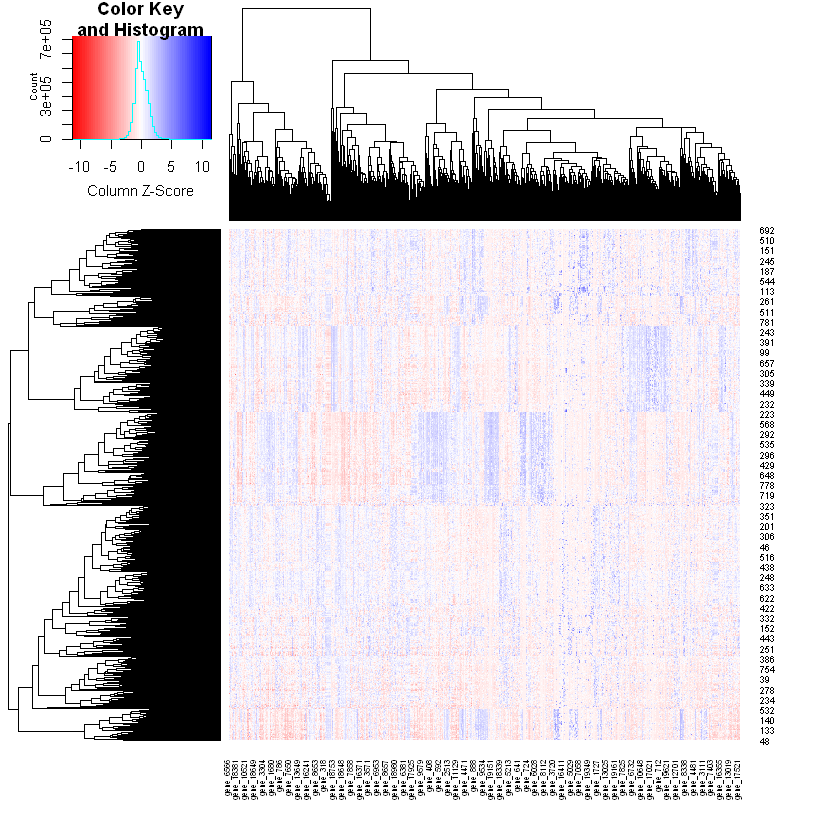

In [4]:



guse<-vv[1:5000]
# use top 5000 genes with highest sd
library(gplots)
heatmap.2(as.matrix(X),
          col=colorRampPalette(c("red","white","blue"))(64),#RowSideColors = as.character(cols),
          hclust=function(x) hclust(x,method="complete"),scale="column",trace="none")
#euclidean distance

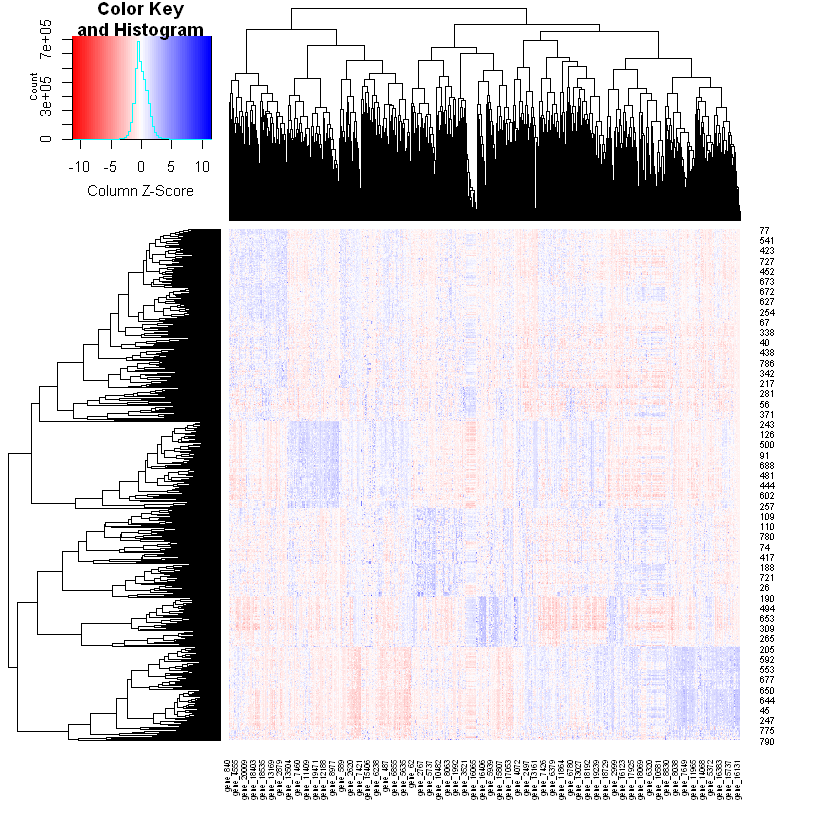

In [9]:
### OBS! This does not run either

heatmap.2(as.matrix(X),
          col=colorRampPalette(c("red","white","blue"))(64),#RowSideColors = as.character(cols()),
          hclust=function(x) hclust(x,method="complete"),scale="column",trace="none",
          distfun=function(x) as.dist((1-cor(t(x),method="pearson",use="pairwise.complete.obs"))/2))
#correlation 

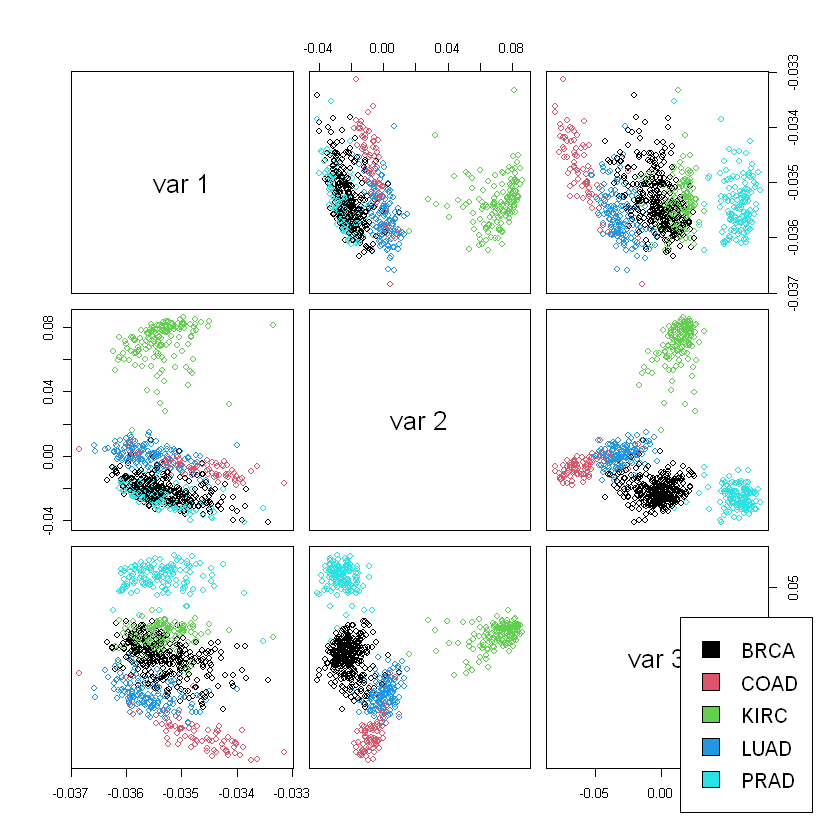

In [5]:
class <- as.matrix(labels)



ss<-irlba(as.matrix(data),10,10)
pairs(ss$u[,1:3],col=as.numeric(as.factor(class)))
par(xpd = TRUE)
legend("bottomright", fill = unique(as.factor(class))[sort.list(as.numeric(as.factor(unique(class))))], legend = c(levels(as.factor(class))))


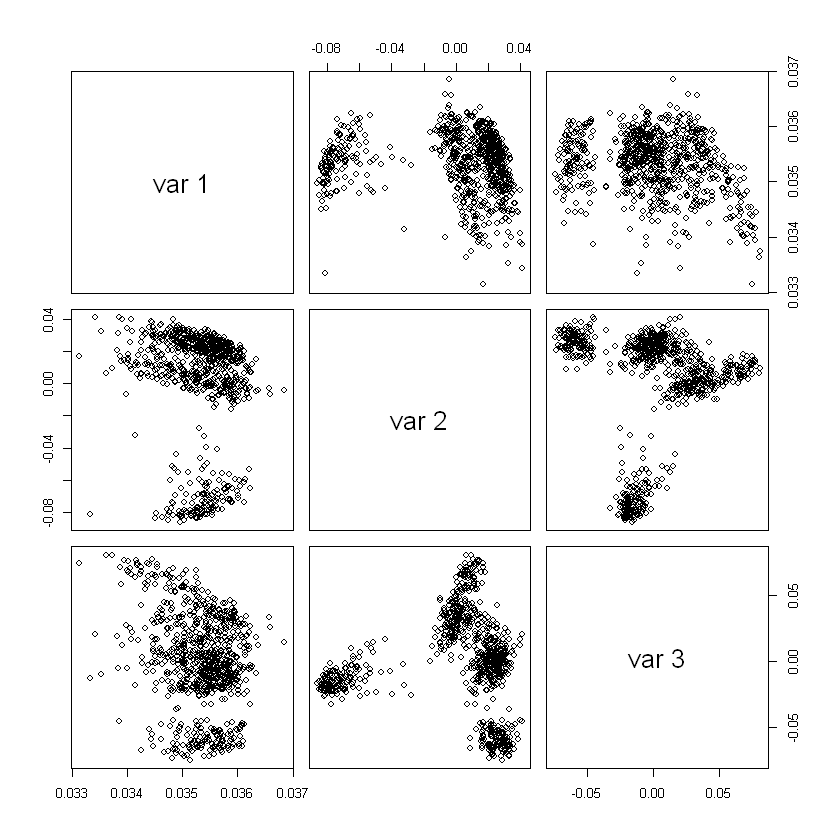

In [10]:
pairs(ss$u[,1:3])

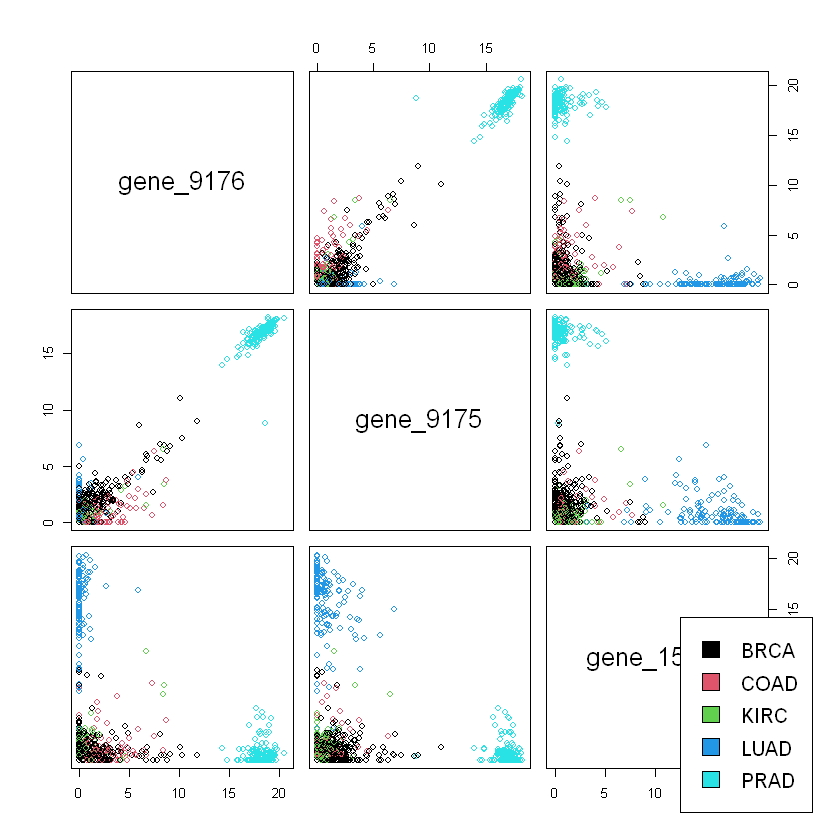

In [11]:
pairs(as.matrix(data[,vv[1:3]]),col=as.numeric(as.factor(class)))
par(xpd = TRUE)
legend("bottomright", fill = unique(as.factor(class))[sort.list(as.numeric(as.factor(unique(class))))], legend = c(levels(as.factor(class))))


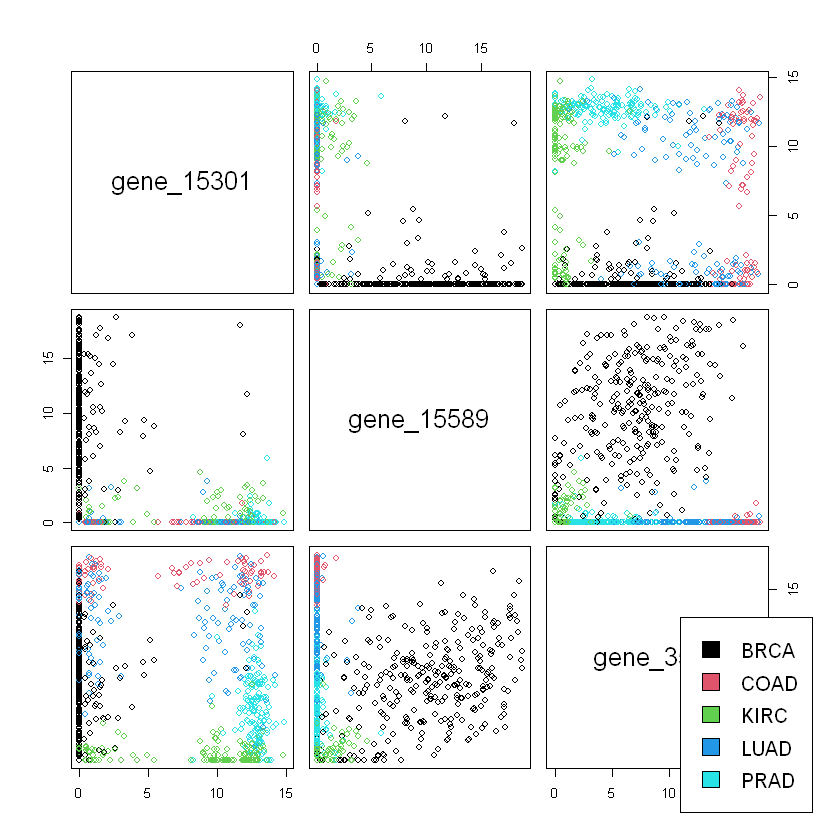

In [12]:
pairs(as.matrix(data[,vv[4:6]]),col=as.numeric(as.factor(class)))
par(xpd = TRUE)
legend("bottomright", fill = unique(as.factor(class))[sort.list(as.numeric(as.factor(unique(class))))], legend = c(levels(as.factor(class))))


Note: The km (kmeans) option only supports a euclidean distance metric when supplying a data matrix.  If you want to cluster a distance matrix, use a different algorithm such as 'hc' or 'pam'.  Changing distance to euclidean

end fraction

clustered

clustered



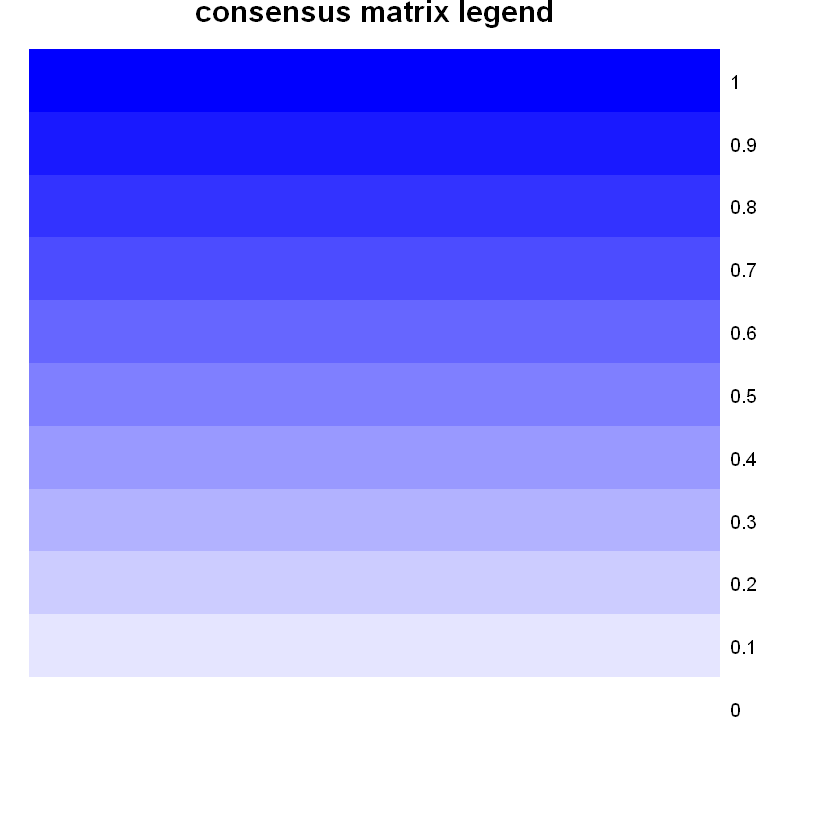

clustered



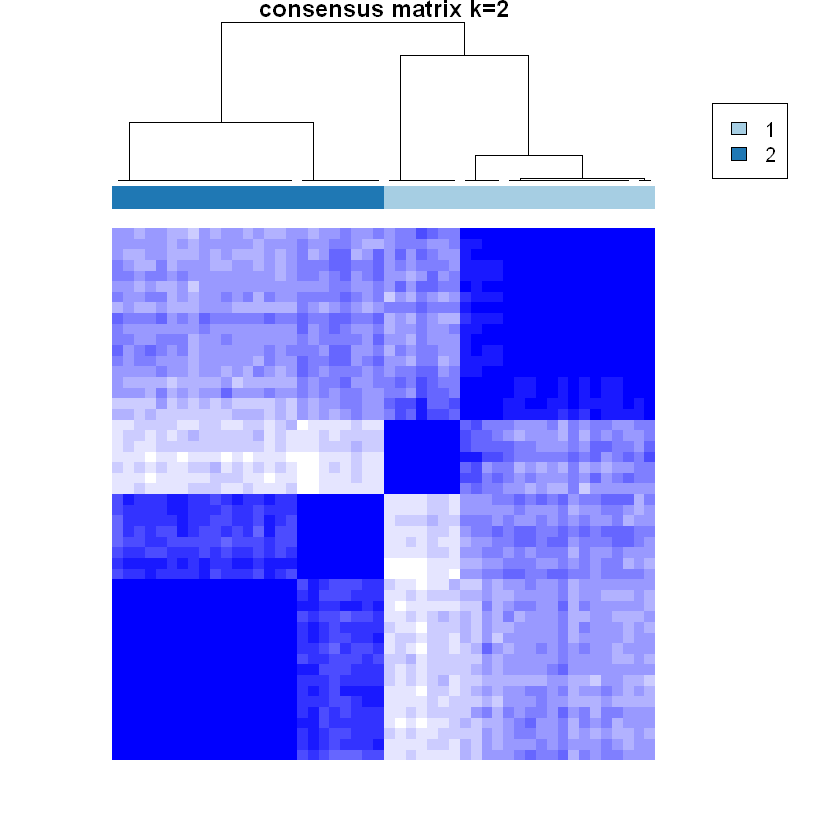

clustered



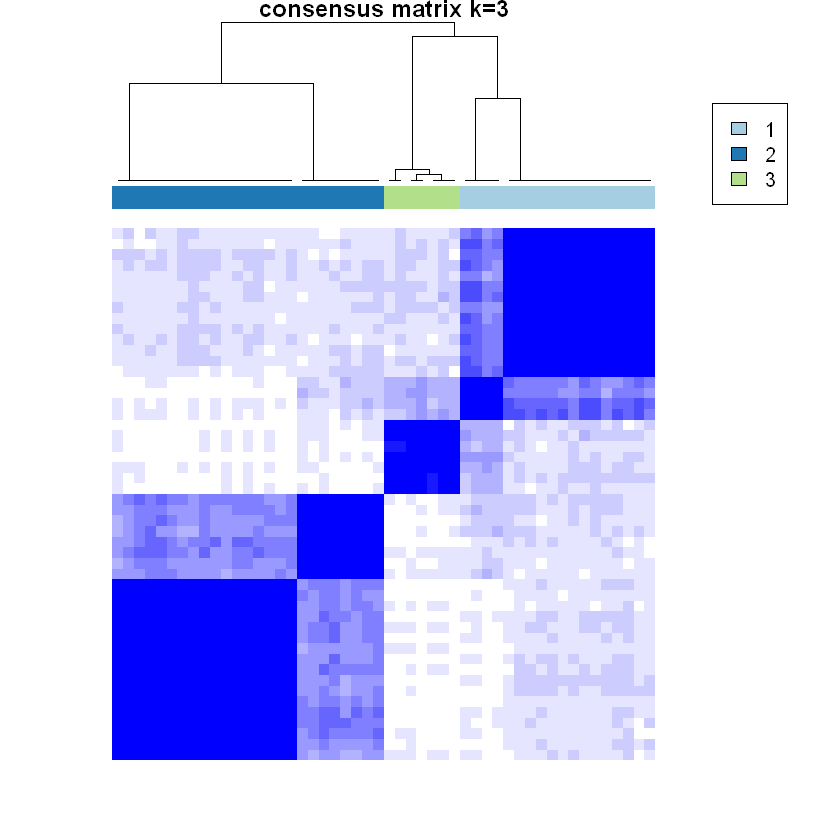

clustered



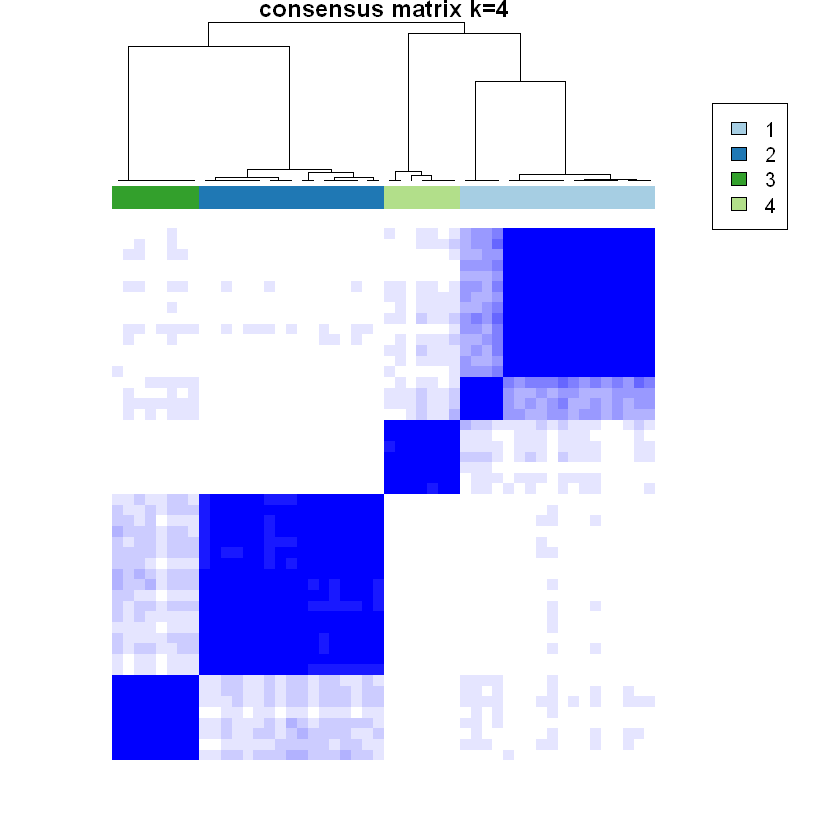

clustered



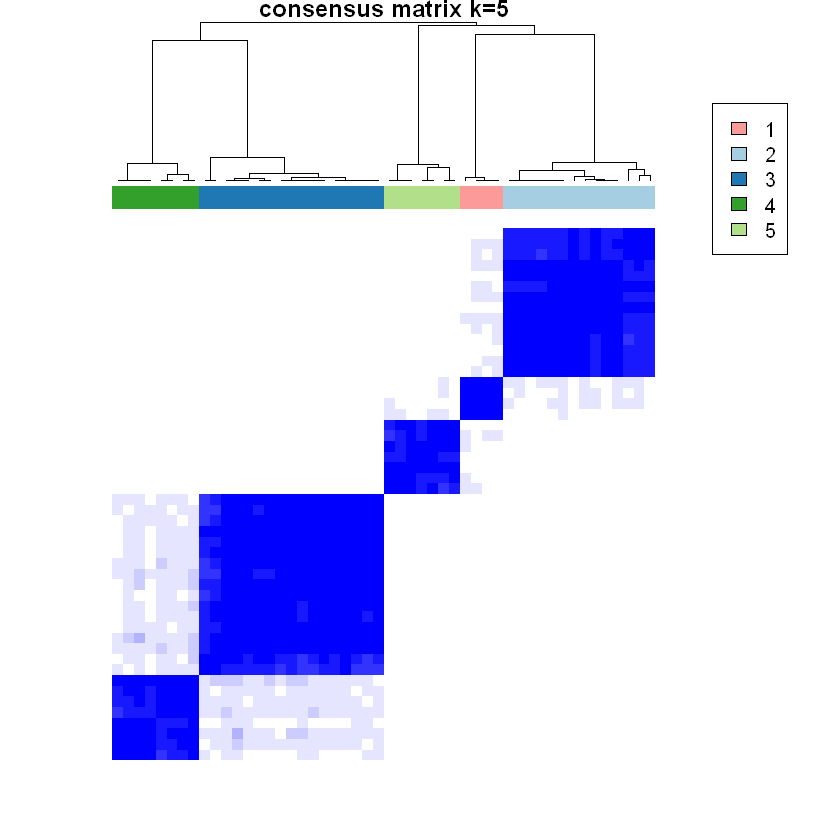

clustered



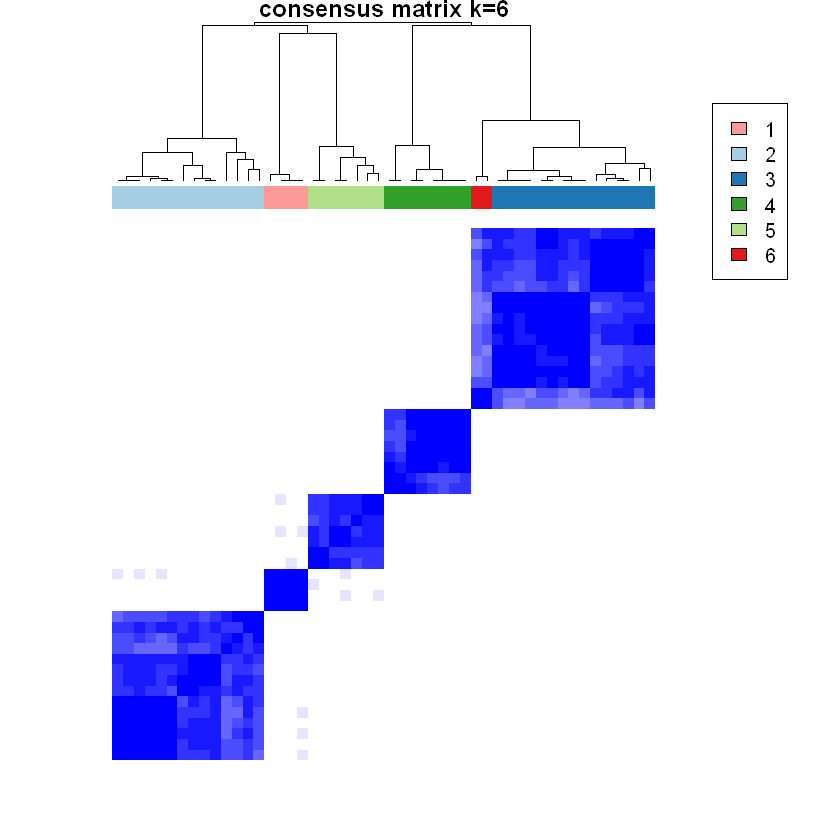

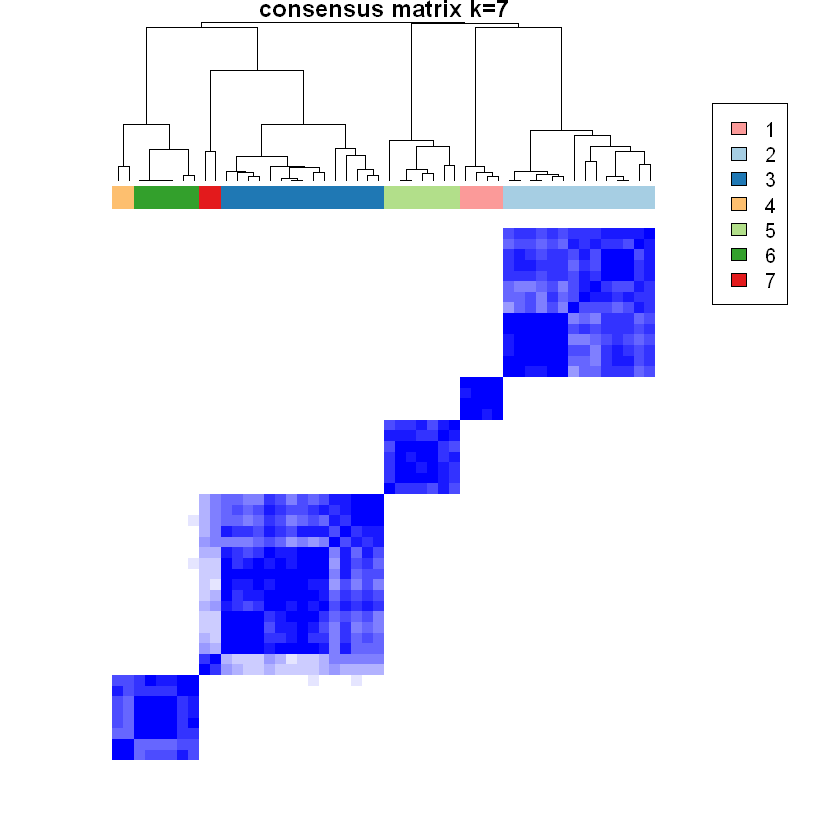

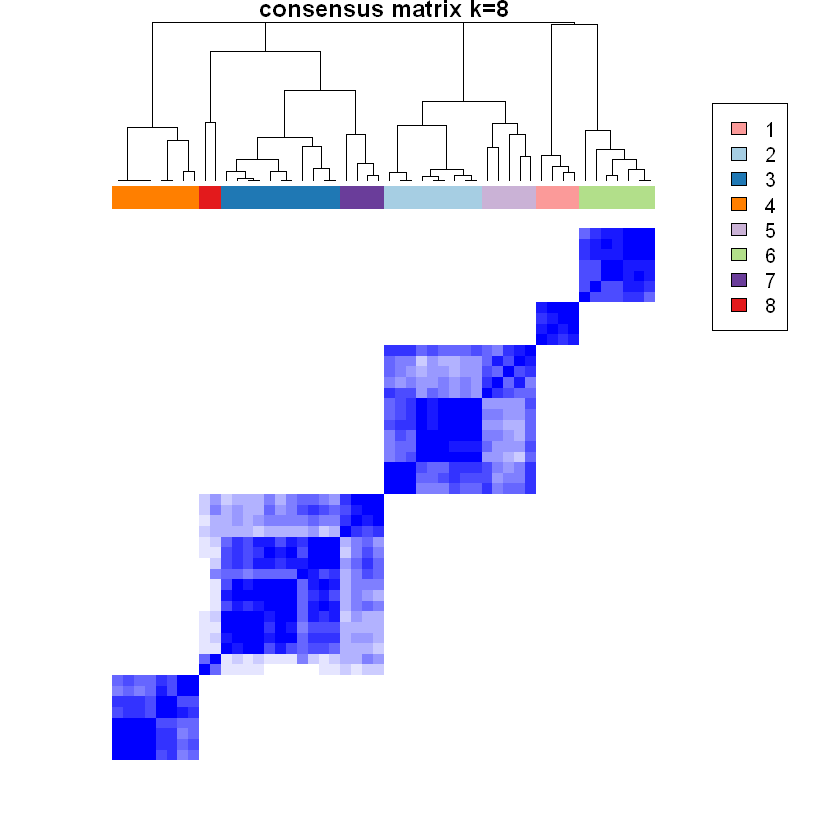

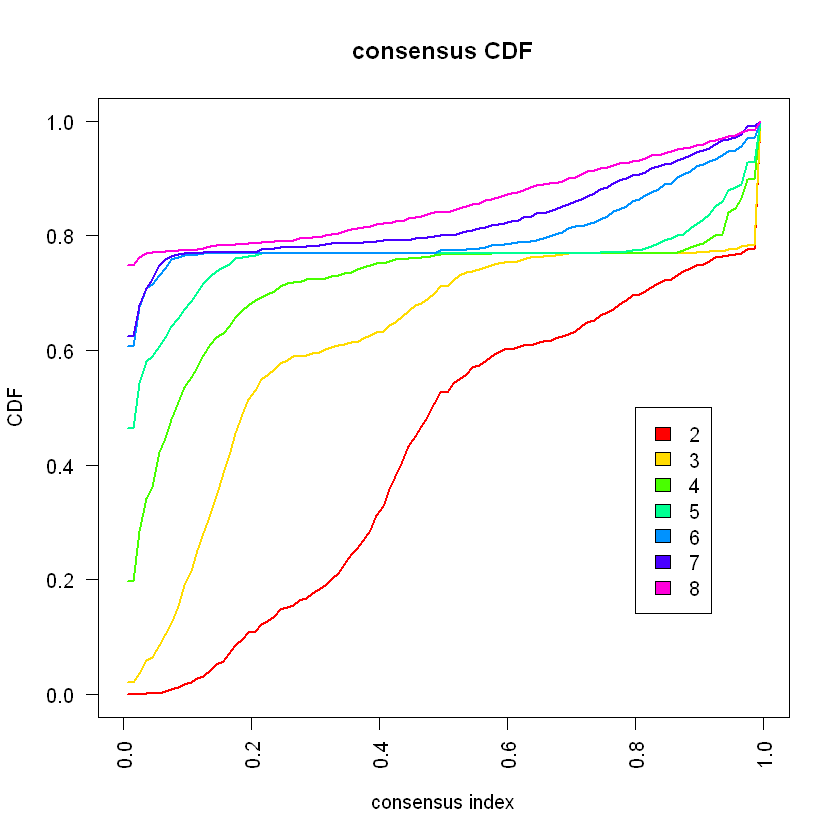

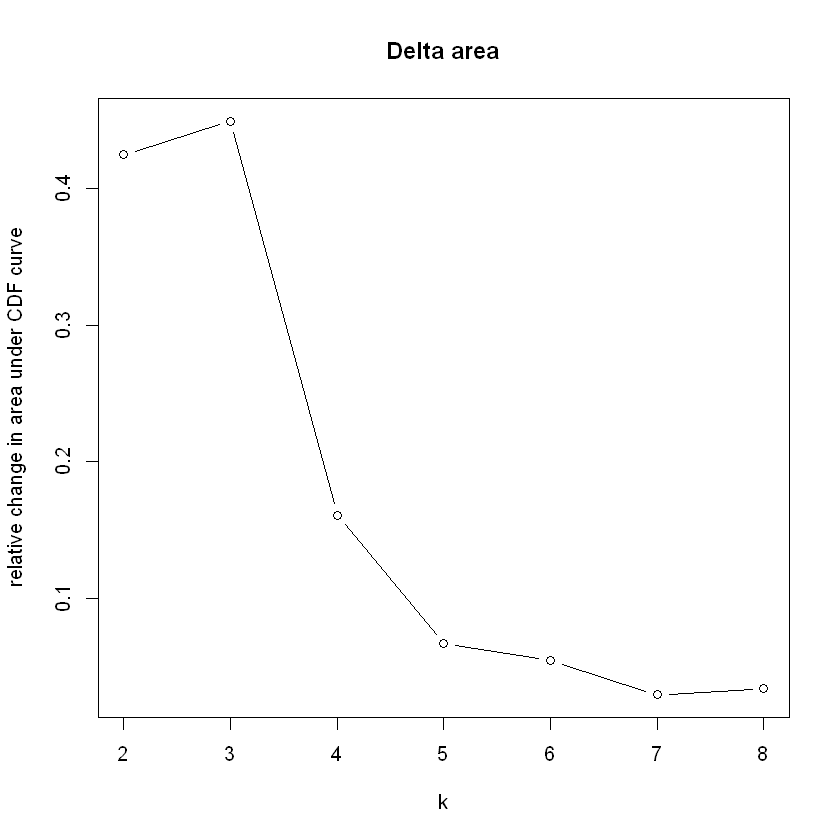

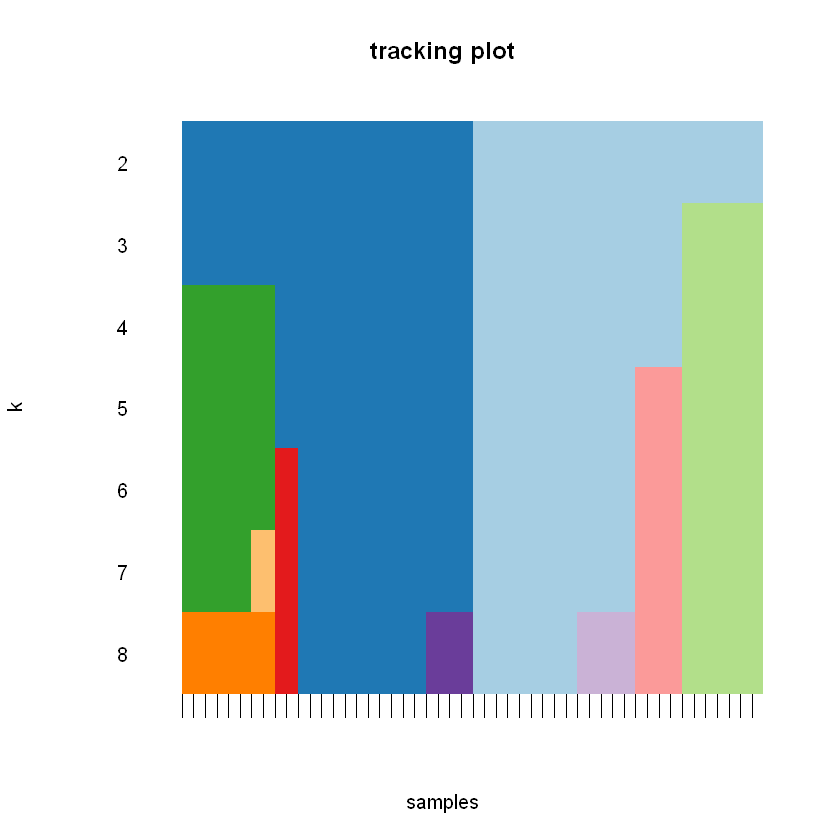

In [5]:
# ConsensusClusterPlus with kmeans



#BiocManager::install("ConsensusClusterPlus")
#browseVignettes("ConsensusClusterPlus")
# Cannot install directly to Rstudio depending on version - go via Bioconductor
library(ConsensusClusterPlus)
# this can be a bit slot depending on the number of features and observations!
ii<-sample(seq(1,801),50)
options(warn=-1)
cc<-ConsensusClusterPlus(as.matrix(t(data[ii,guse[1:500]])),maxK=8,reps=100,pItem=.6,pFeature=.6,
                         clusterAlg="km")

# This is consensus clustering using kmeans, with a maximum of 8 clusters. Default is eucliden distnance. 
options(warn=0)

In [19]:
class <- as.data.frame(labels)
class[ii,]

[1] "COAD" "LUAD" "BRCA" "PRAD" "LUAD" "KIRC" "LUAD" "BRCA" "PRAD" "BRCA"
[11] "LUAD" "BRCA" "PRAD" "KIRC" "COAD" "BRCA" "PRAD" "BRCA" "LUAD" "COAD"
[21] "LUAD" "LUAD" "PRAD" "BRCA" "KIRC" "LUAD" "LUAD" "KIRC" "KIRC" "PRAD"
[31] "BRCA" "LUAD" "BRCA" "PRAD" "LUAD" "COAD" "BRCA" "KIRC" "LUAD" "BRCA"
[41] "KIRC" "LUAD" "BRCA" "PRAD" "BRCA" "BRCA" "LUAD" "BRCA" "BRCA" "BRCA"

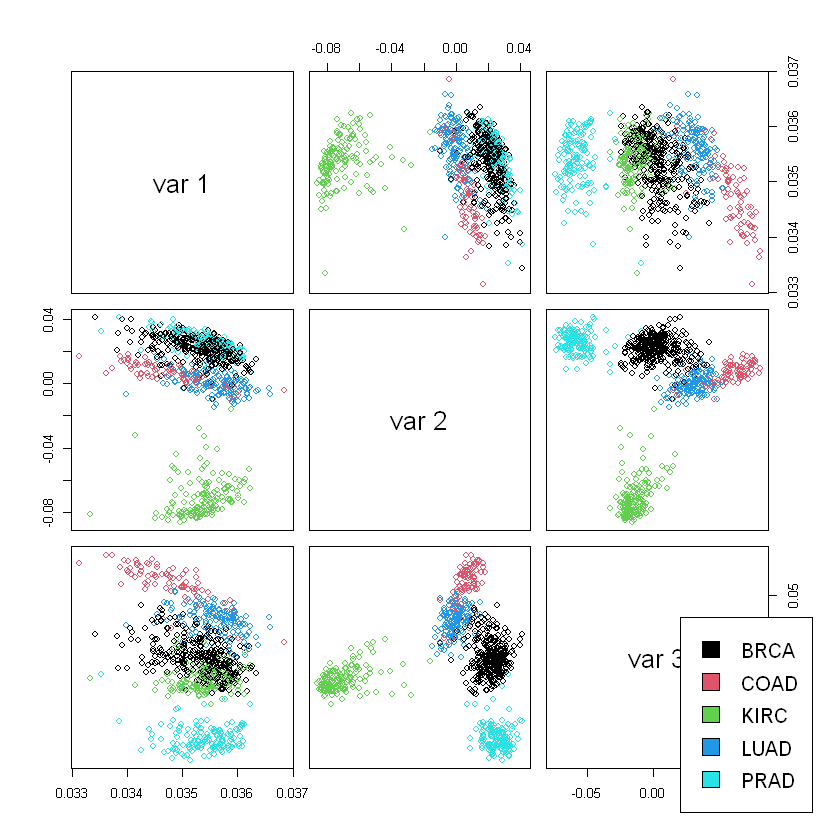

In [6]:
ss<-irlba(as.matrix(data),10,10)
pairs(ss$u[,1:3],col=as.numeric(as.factor(class)))
par(xpd = TRUE)
legend("bottomright", fill = unique(as.factor(class))[sort.list(as.numeric(as.factor(unique(class))))], legend = c(levels(as.factor(class))))


[1] "COAD" "LUAD" "BRCA" "PRAD" "LUAD" "KIRC" "LUAD" "BRCA" "PRAD" "BRCA"
[11] "LUAD" "BRCA" "PRAD" "KIRC" "COAD" "BRCA" "PRAD" "BRCA" "LUAD" "COAD"
[21] "LUAD" "LUAD" "PRAD" "BRCA" "KIRC" "LUAD" "LUAD" "KIRC" "KIRC" "PRAD"
[31] "BRCA" "LUAD" "BRCA" "PRAD" "LUAD" "COAD" "BRCA" "KIRC" "LUAD" "BRCA"
[41] "KIRC" "LUAD" "BRCA" "PRAD" "BRCA" "BRCA" "LUAD" "BRCA" "BRCA" "BRCA"

Warning message in xtfrm.data.frame(x):
"cannot xtfrm data frames"
Warning message in xtfrm.data.frame(x):
"cannot xtfrm data frames"
Warning message in xtfrm.data.frame(x):
"cannot xtfrm data frames"
Warning message in xtfrm.data.frame(x):
"cannot xtfrm data frames"


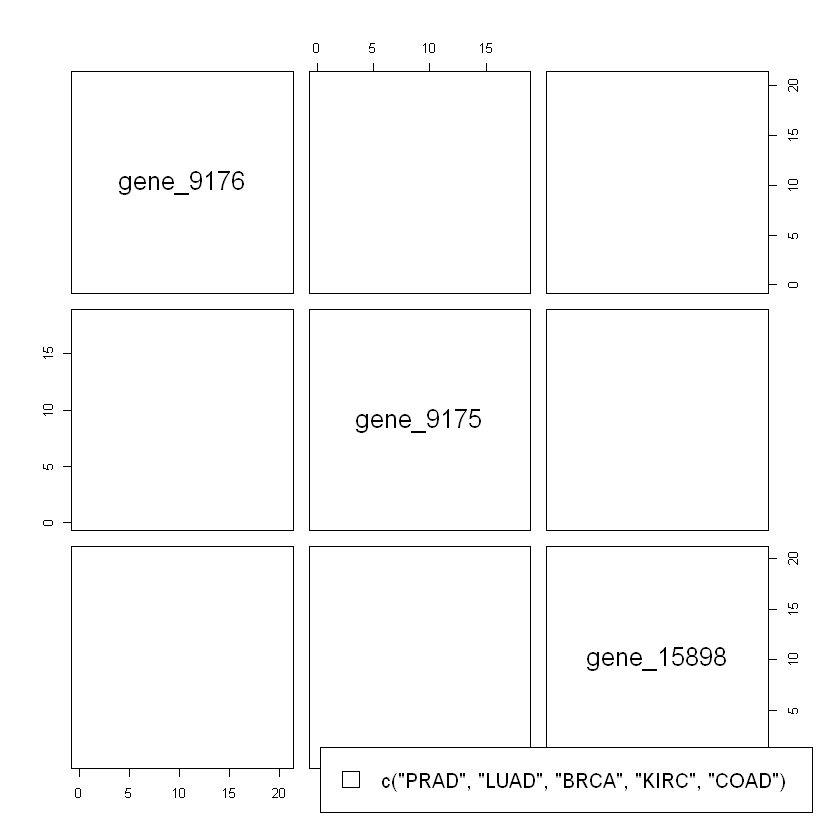

In [18]:
ccu<-cc[[3]]
mda::confusion(ccu$consensusClass,class[ii,])
ccu<-cc[[5]]
mda::confusion(ccu$consensusClass,class[ii,])
ccu<-cc[[6]]
mda::confusion(ccu$consensusClass,class[ii,])

         true
predicted BRCA COAD KIRC LUAD PRAD
        1    0    4    0   14    0
        2   17    0    0    0    8
        3    0    0    7    0    0

         true
predicted BRCA COAD KIRC LUAD PRAD
        1    0    4    0    0    0
        2    0    0    0   14    0
        3   17    0    0    0    0
        4    0    0    0    0    8
        5    0    0    7    0    0

         true
predicted BRCA COAD KIRC LUAD PRAD
        1    0    4    0    0    0
        2    0    0    0   14    0
        3   15    0    0    0    0
        4    0    0    0    0    8
        5    0    0    7    0    0
        6    2    0    0    0    0

end fraction

clustered

clustered



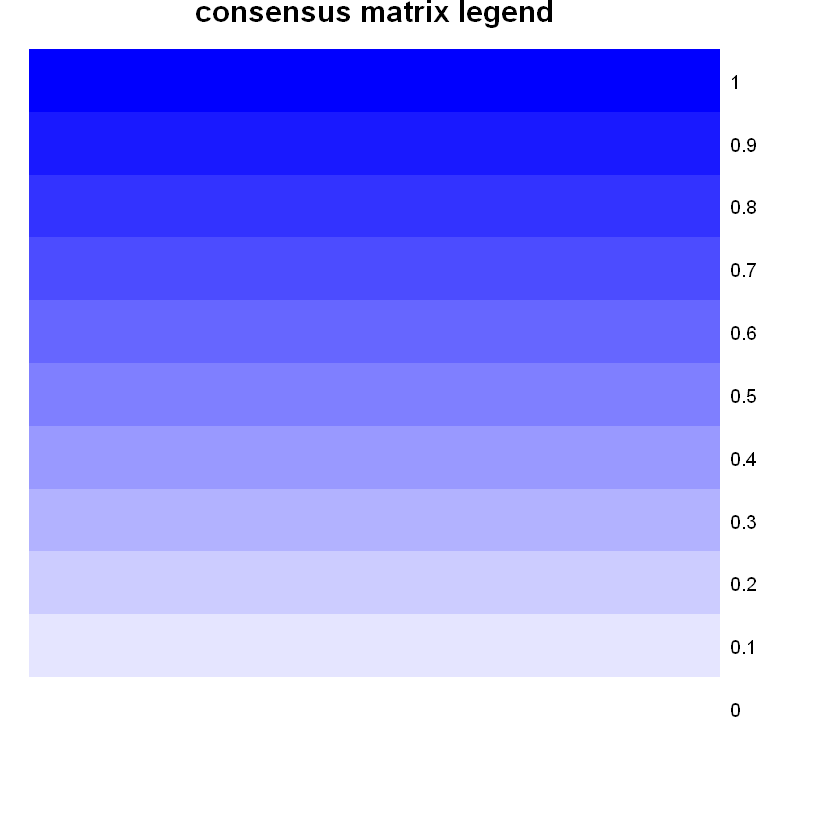

clustered



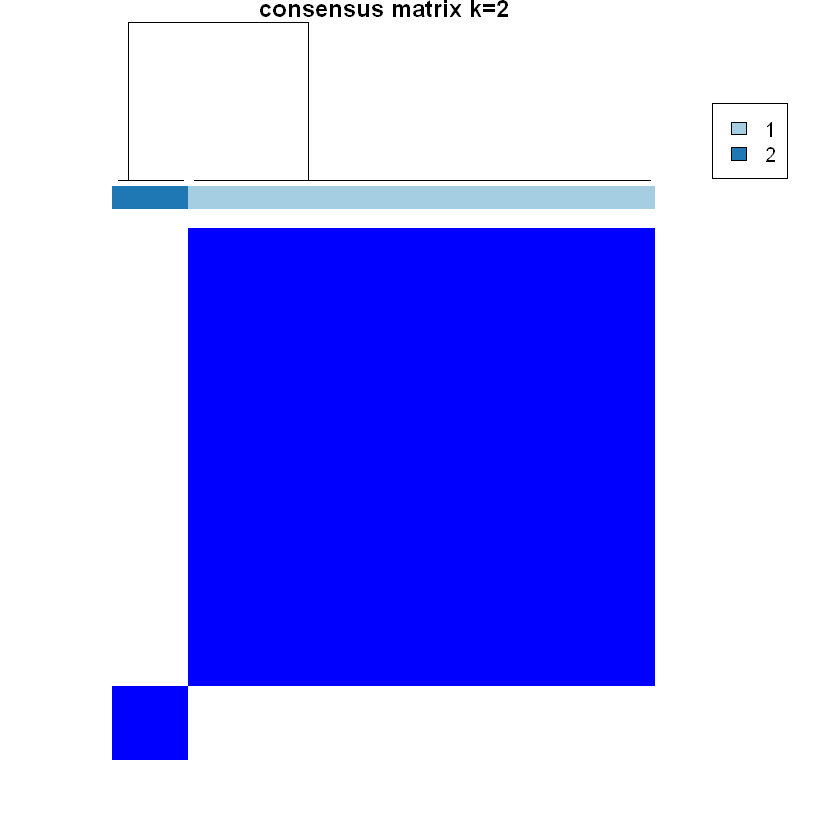

clustered



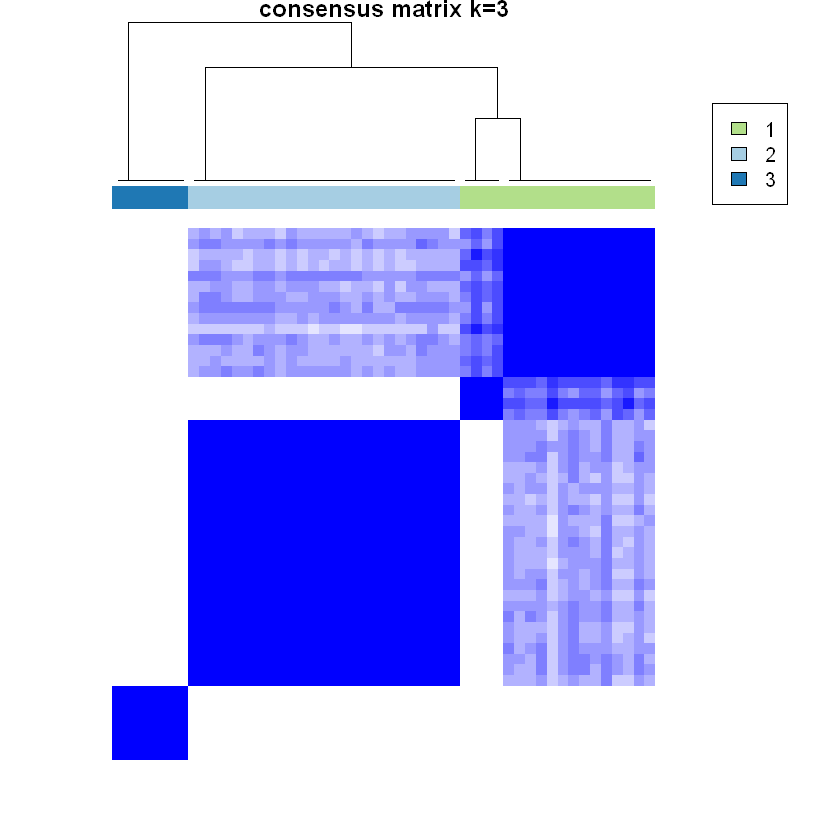

clustered



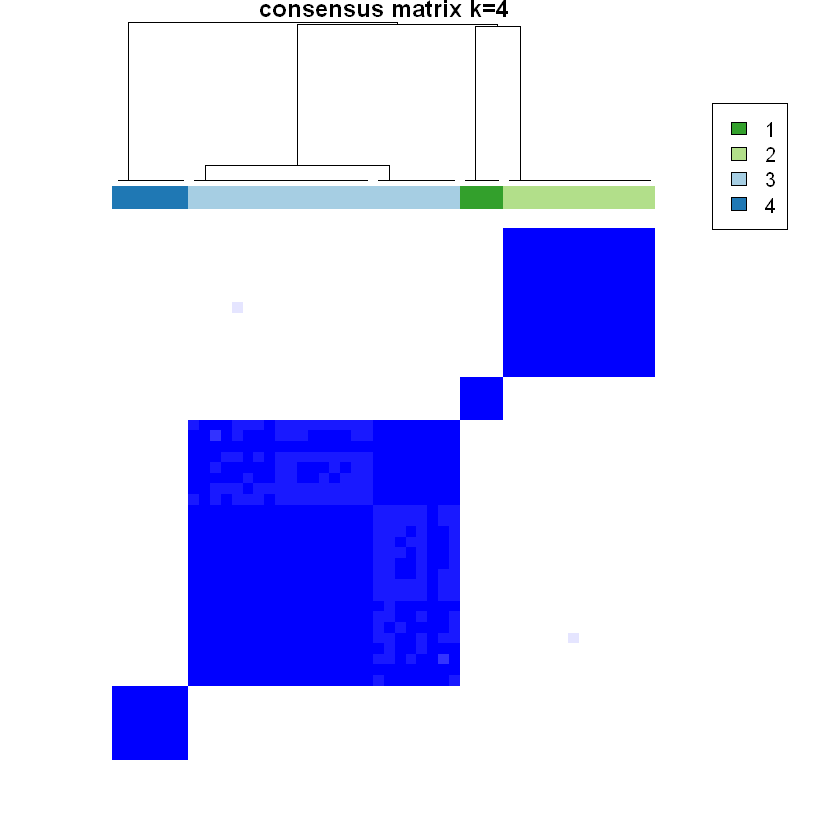

clustered



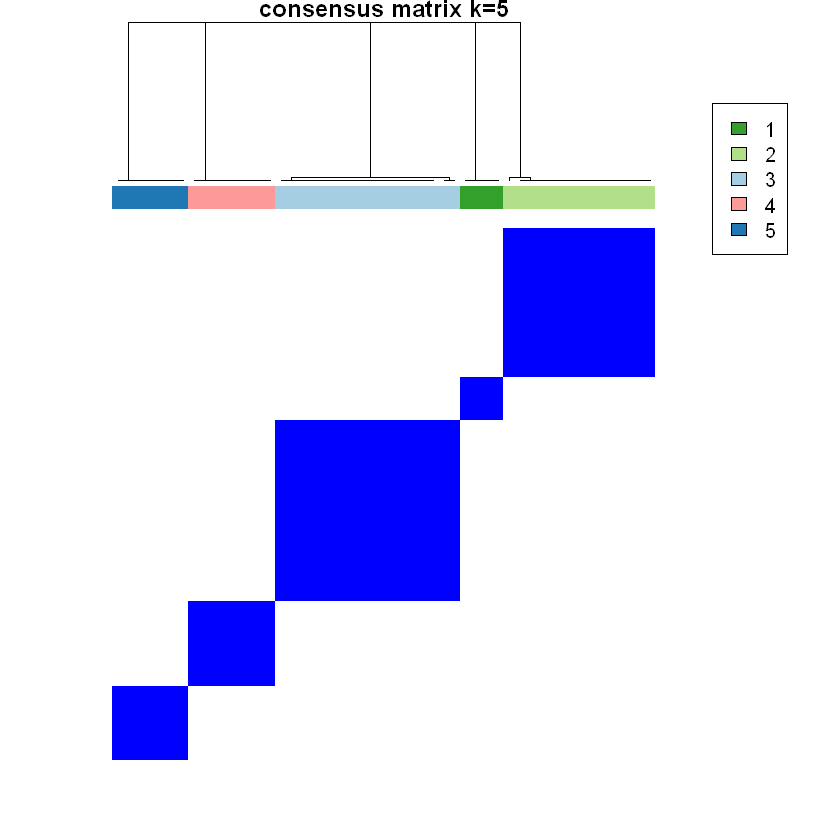

clustered



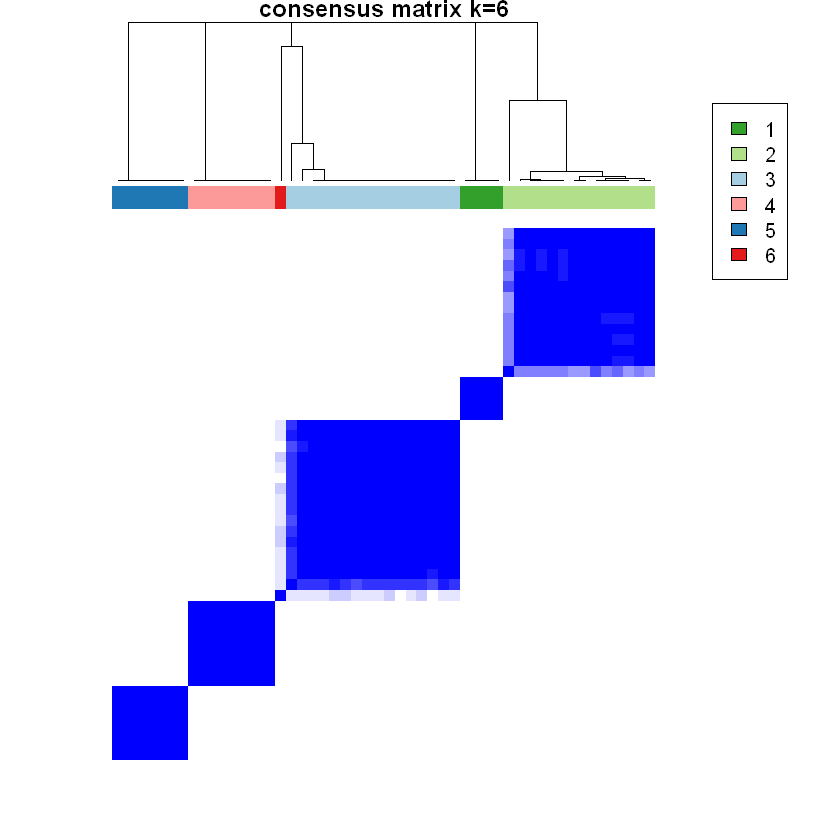

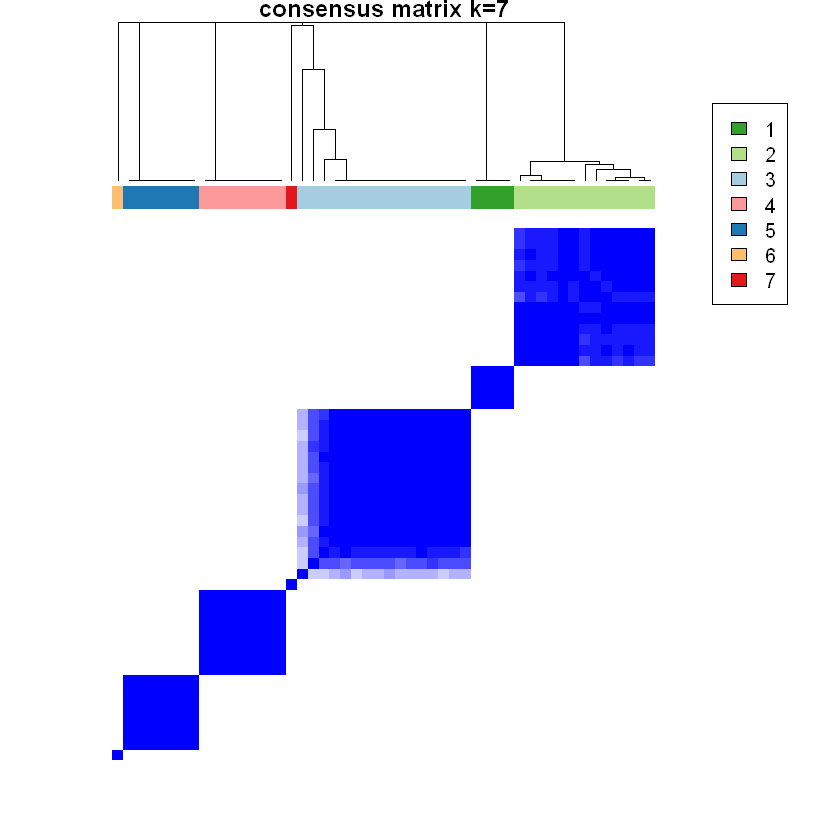

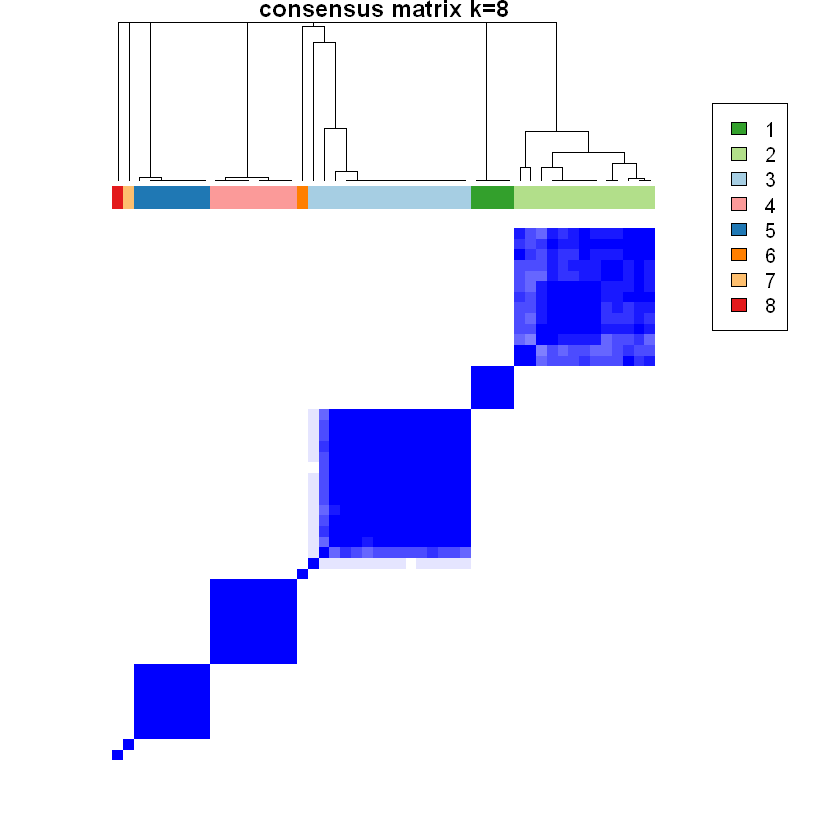

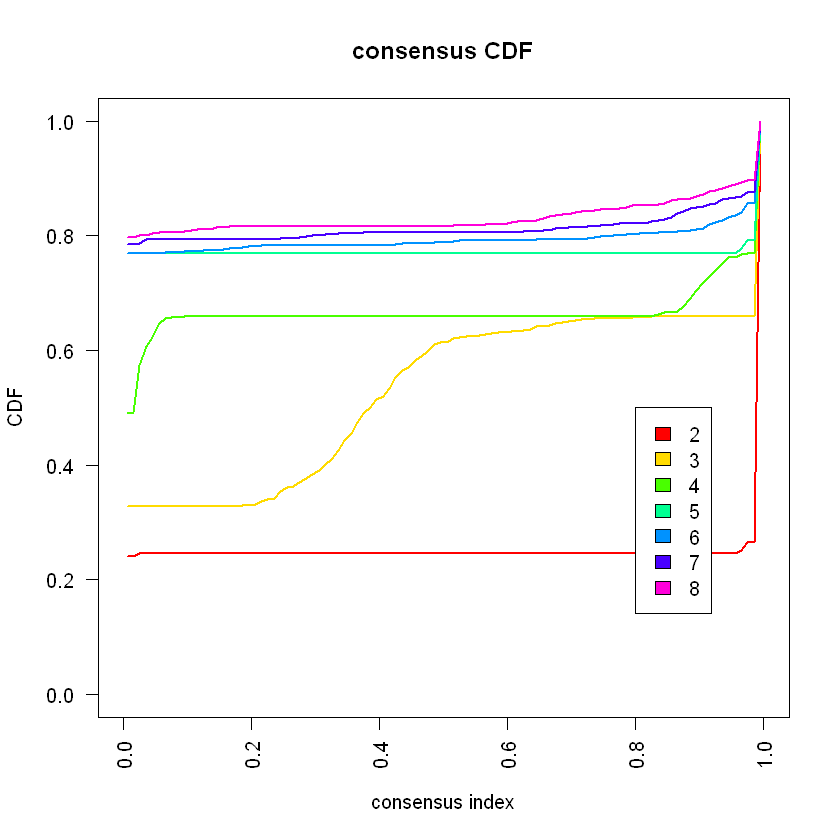

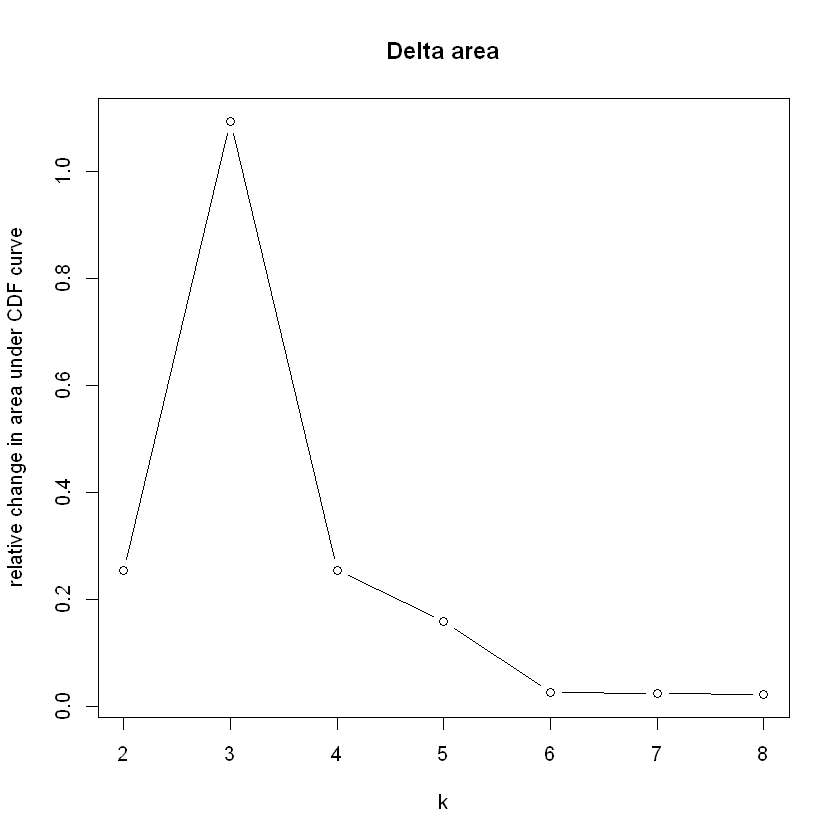

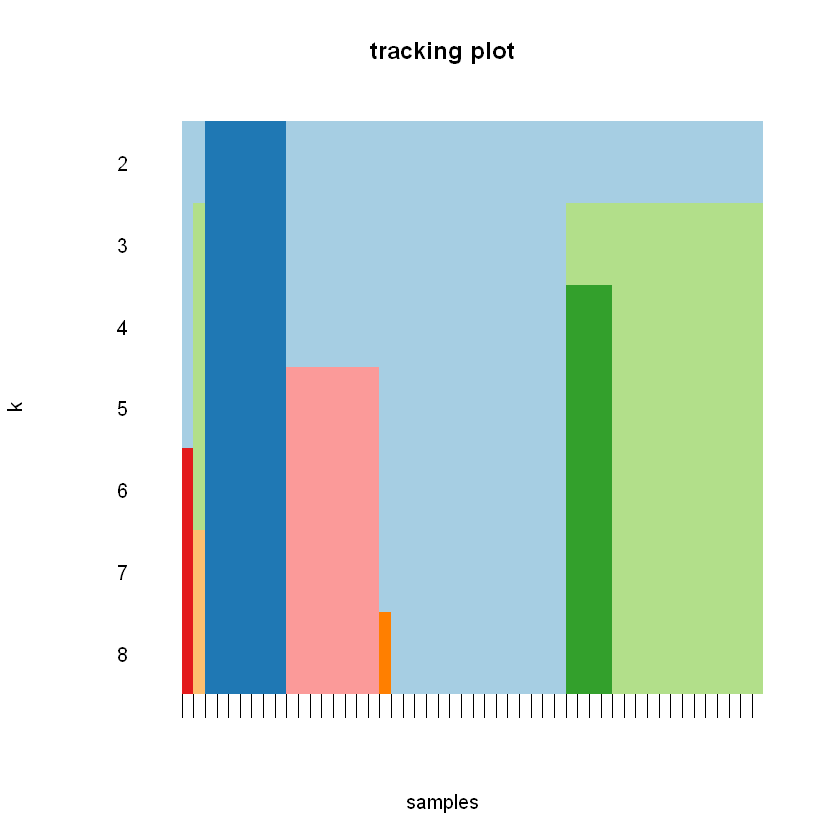

In [28]:
# ConsensusClusterPlus with hc


cc<-ConsensusClusterPlus(as.matrix(t(data[ii,guse[1:500]])),maxK=8,reps=100,pItem=.6,pFeature=.6,distance="pearson",clusterAlg="hc")

In [29]:
ccu<-cc[[3]]
mda::confusion(ccu$consensusClass,class[ii,])
ccu<-cc[[5]]
mda::confusion(ccu$consensusClass,class[ii,])
ccu<-cc[[6]]
mda::confusion(ccu$consensusClass,class[ii,])

         true
predicted BRCA COAD KIRC LUAD PRAD
        1    0    4    0   14    0
        2   17    0    0    0    8
        3    0    0    7    0    0

         true
predicted BRCA COAD KIRC LUAD PRAD
        1    0    4    0    0    0
        2    0    0    0   14    0
        3   17    0    0    0    0
        4    0    0    0    0    8
        5    0    0    7    0    0

         true
predicted BRCA COAD KIRC LUAD PRAD
        1    0    4    0    0    0
        2    0    0    0   14    0
        3   16    0    0    0    0
        4    0    0    0    0    8
        5    0    0    7    0    0
        6    1    0    0    0    0

Conducting Meinshausen & Buhlmann graph estimation (mb)....done


[1] "method"    "path"      "beta"      "lambda"    "sparsity"  "df"       
 [7] "sym"       "scr"       "cov.input" "data"

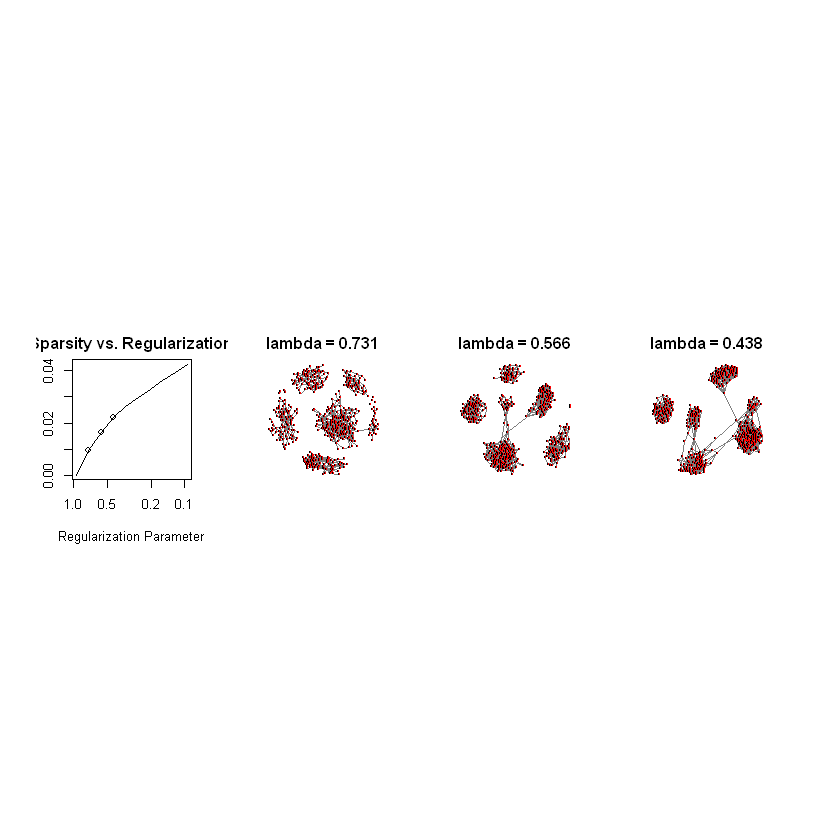

In [17]:
# Graphical Lasso
#install.packages("ElemStatLearn")
#install.packages("huge")
library(ElemStatLearn)
library(huge)
X <- data[,guse]
# The network modeling package using sparse gaussian graphical models 

# Huge = high-dimensional undirected graph estimation
# The main function for high-dimensional undirected graph estimation. 
# Three graph estimation methods, including
# (1) Meinshausen-Buhlmann graph estimation (mb) 
# (2) graphical lasso (glasso) 
# (3) correlation thresholding graph estimation (ct) and 
# (4) tuning-insensitive graph estimation (tiger),
# are available for data analysis.

its <- sample(seq(1,dim(data)[1]),500)
# select 400 digits at random
gg <- huge(t(X[its,]))
names(gg)
plot(gg)




Conducting Meinshausen & Buhlmann graph estimation (mb)....done


<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient



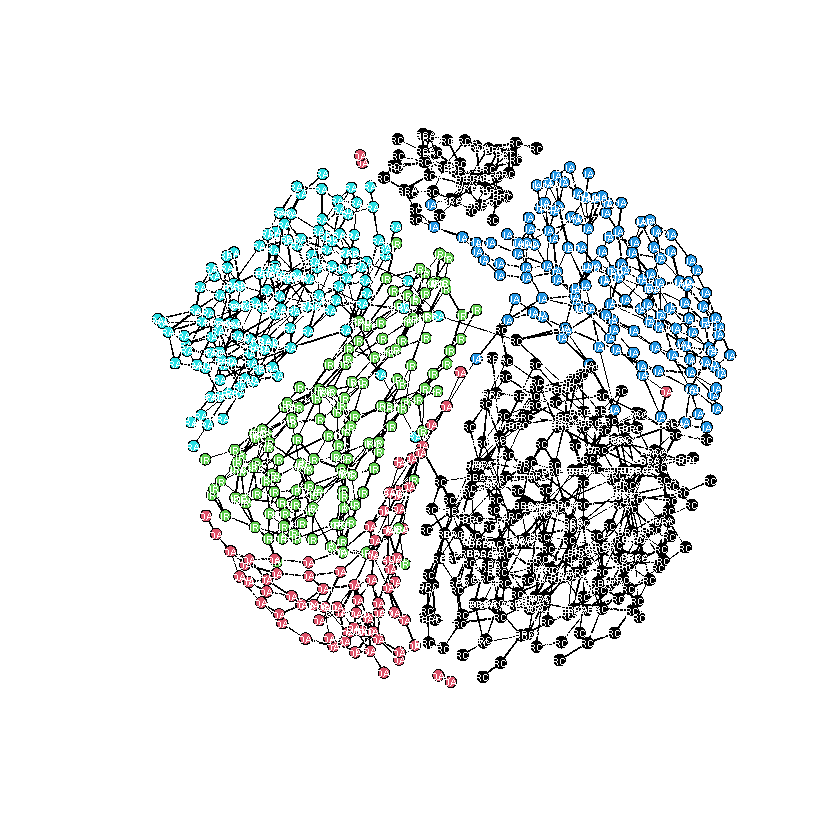

In [29]:
# Sort by top variance genes
library(irlba)
library(network)
library(huge)
library(ElemStatLearn)

ss<-irlba(as.matrix(X),nu=25,nv=25)

class <- as.matrix(labels)

# leading 100 PCs
g<-huge(t(ss$u))
plot.network(network(g$path[[3]]),usearrows=F,displayisolates=F,label=class,label.pos=5,label.col="white",label.cex=.5,vertex.col=as.numeric(as.factor(class)))

<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient



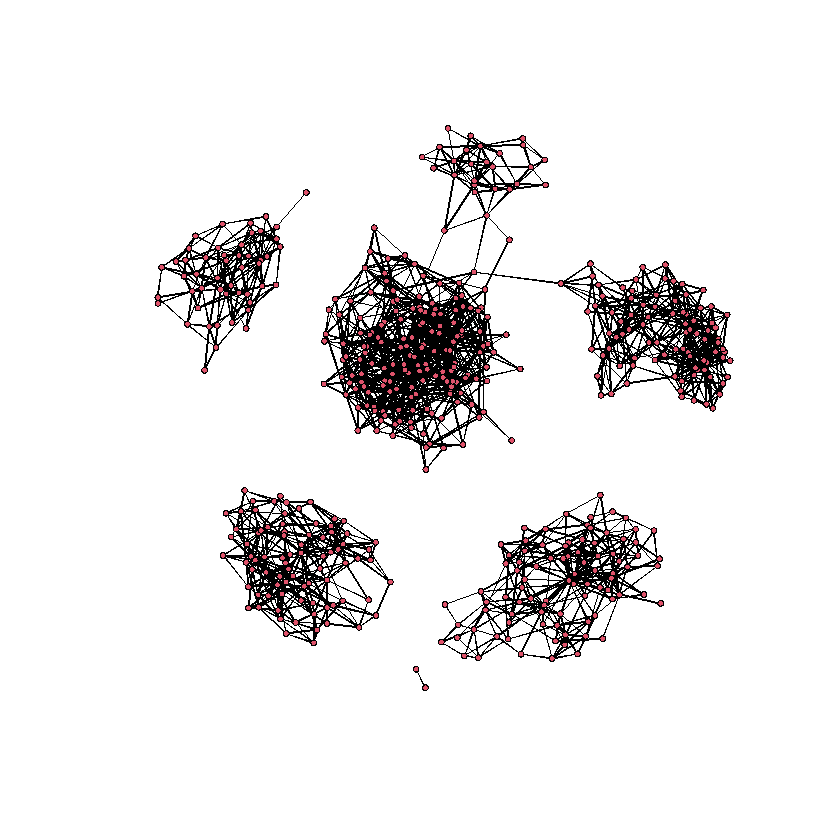

In [33]:
# network of genes instead

plot.network(network(gg$path[[3]]),vertex.cex=.5,usearrows=F,displayisolates=F)